In [1]:
from sktime.datasets import load_airline
import matplotlib.pyplot as plt
from sktime.forecasting.all import temporal_train_test_split
from sktime.forecasting.all import ExponentialSmoothing
from sktime.performance_metrics.forecasting import smape_loss

ImportError: cannot import name 'load_airline' from 'sktime.datasets' (unknown location)

# Load Dataset

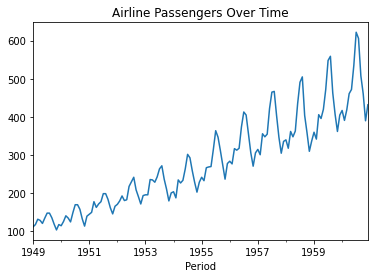

In [12]:
y = load_airline()
y.plot(title='Airline Passengers Over Time')
plt.show()

# Split y into Train and Test Groups

In [14]:
y_train, y_test = temporal_train_test_split(y)

In [17]:
print("Length of train set is " + str(y_train.shape[0]))
print("Length of test set is " + str(y_test.shape[0]))

Length of train set is 108
Length of test set is 36


# Simple Exponential Smoothing - sktime


smape: 0.23195770507418306


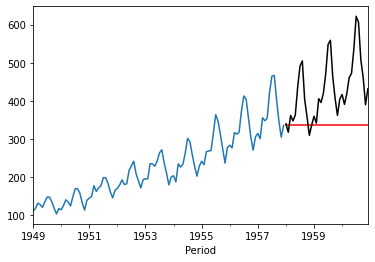

In [18]:
# Build and fit model, default 
model = ExponentialSmoothing()
model.fit(y_train)
# Create forecast horizon
fh = list(range(1, 1+len(y_test)))
#predict using the fitted model across the defined forecast horizon
y_pred = model.predict(fh=fh )
# Plot the model and forecast
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')
# evaluate the model performance with just sMAPE
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')

What value was forecasted for the default method for sktime SES?

In [29]:
print(y_train[-5:])
print(y_pred[:5])

Period
1957-08    467.0
1957-09    404.0
1957-10    347.0
1957-11    305.0
1957-12    336.0
Freq: M, Name: Number of airline passengers, dtype: float64
1958-01    336.0
1958-02    336.0
1958-03    336.0
1958-04    336.0
1958-05    336.0
Freq: M, dtype: float64


 - What are we doing when we run .fit()?
 - Can we initialize with a given alpha?
 - Look at some differences with statsmodels.

# Simple Exponential Smoothing - statsmodels

What are some differences with statsmodels and sktime implementation

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


smape: 0.17952466587136323


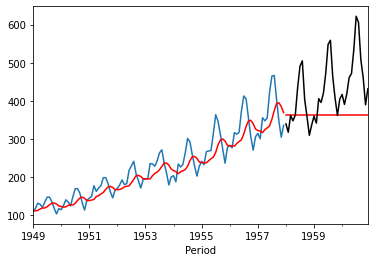

In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=0.2,optimized=False)
y_pred = fit1.forecast(36)
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color='black')
fit1.fittedvalues.plot(color='red')
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')

# Holt Winters Models

## With Trend

smape: 0.14602438343329635


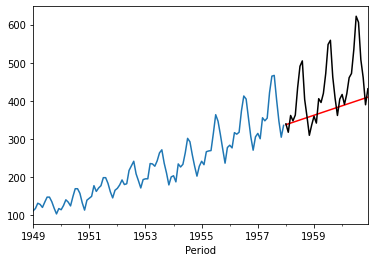

In [6]:
model = ExponentialSmoothing(trend='add')
model.fit(y_train)
fh = list(range(1, 1+len(y_test)))
y_pred = model.predict(fh=fh )
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')

## Multiplicative Trend

smape: 0.15765095975939616


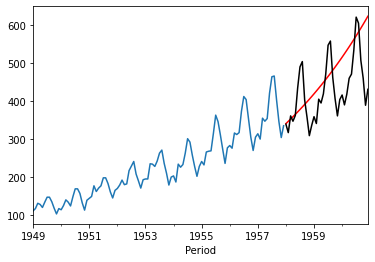

In [7]:
model = ExponentialSmoothing(trend='mul')
model.fit(y_train)

y_pred = model.predict(fh=fh )
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')

## Seasonality

smape: 0.12229310238759734


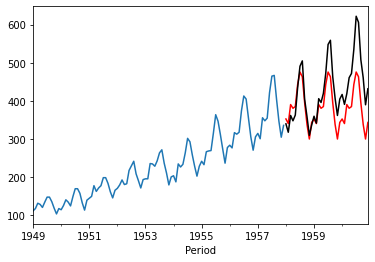

In [8]:
model = ExponentialSmoothing( seasonal='add')
model.fit(y_train)
fh = list(range(1, 1+len(y_test)))
y_pred = model.predict(fh=fh )
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')

## Trend+Seasonality

smape: 0.05027648292576911


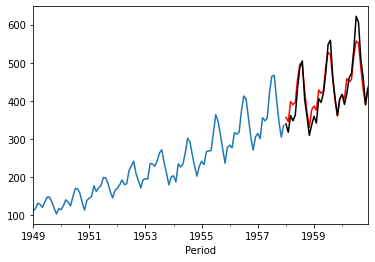

In [9]:
model = ExponentialSmoothing(trend='add', seasonal='add')
model.fit(y_train)
fh = list(range(1, 1+len(y_test)))
y_pred = model.predict(fh=fh )
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')

## Mult Trend + Seasonality

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


smape: 0.10078075494675137


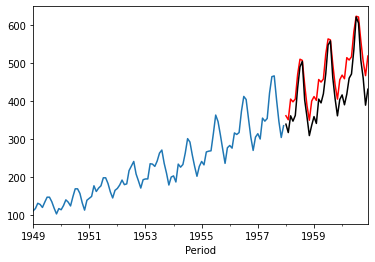

In [10]:
model = ExponentialSmoothing(trend='mul', seasonal='add')
model.fit(y_train)
fh = list(range(1, 1+len(y_test)))
y_pred = model.predict(fh=fh )
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


smape: 0.12153553243098164


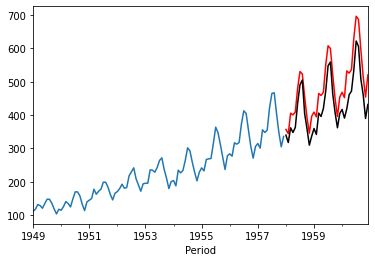

In [33]:
model = ExponentialSmoothing(trend='mul', seasonal='mul')
model.fit(y_train)
fh = list(range(1, 1+len(y_test)))
y_pred = model.predict(fh=fh )
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')
smape = smape_loss(y_test, y_pred )
print(f'smape: {smape}')